<center><h1>Lecture-07: Outlier detection, Recommender Systems</h1><center>
<p>&nbsp;</p>
<center>CDSCO2004U "Machine Learning and Deep Learning"</center>

# Exercise-01: Outlier detection
Write a code using Pandas/Python to implement IQR (Interquartile Range) method to detect and treat outliers in the given bike.csv data set. 
- [Hints] Use Boxplot to detect outliers.

In [1]:
# import required packages
import pandas
import numpy as np

# upload the dataset
BIKE = pandas.read_csv("bike.csv")
BIKE

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<AxesSubplot:>

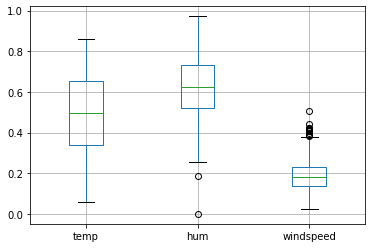

In [2]:
#[TODO] Segregate the variables into numeric and categorical values.
numeric_col = ['temp','hum','windspeed']
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
BIKE.boxplot(numeric_col)

In [3]:
#[TODO] Removal of Outliers
# Hints: use IQR concept to do it: Already covered during the class
for x in ['windspeed']:
    q75,q25 = np.percentile(BIKE.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
 #data points that lie outside of the lower and the upper bound with a NULL value.
    BIKE.loc[BIKE[x] < min,x] = np.nan
    BIKE.loc[BIKE[x] > max,x] = np.nan

In [4]:
#[TODO] Having replaced the outliers with NaN, now check the sum of null values or missing 
# values using the below code
BIKE.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

In [5]:
#[TODO] Drop the null values
BIKE = BIKE.dropna(axis = 0)

In [6]:
##[TODO] check for the presence of missing or null values in the dataset
BIKE.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#  Exercise-02: Recommender Systems
- In Content-Based Filtering, the similarity between different products is calculated on the basis of the attributes of the products (genre, actors, director of the movie or the publishment company). 
- In contrary, collaboartive filtering tries to leverage the information (data) provided by other users. The intution behind it is that if a user A likes movie X and Y, and if user B likes movie X, there is a high probability that B will like the movie Y as well.
- Now use given two datasets and complete the required steps. There are four columns names in u.data.csv file. They are 'user_id, item_id, rating, and timestamp.
- [Hints] you can get the inspiration from the Demo example taught in the class.

In [7]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Specify Column Names. They are not included in the file 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

#Load the user data
user_data = pd.read_csv("u.data.csv", sep='\t', names=column_names)
#item_id is the  key for the movie. Rating is the score user_id gave to the item_id 

#Load the Movie Data
movie_metadata = pd.read_csv("Movie_Id_Titles.csv")

In [9]:
# [TODO] Extract the year from the title column and create a new column with this information
#get the last six characters of Title
movie_metadata["Publishment Year"] = movie_metadata["title"].str[-6:]

#Remove Parantheses from string
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace("(","")
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace(")","")

#Remove spaces
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace(" ","")

#Replace nknown with the mode 
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace("nknown","1996")

#Show all values
print(movie_metadata["Publishment Year"].unique())

#Try to find where the value 5V is coming from
movie_metadata[movie_metadata["Publishment Year"].str.contains("5V")]

['1995' '1994' '1996' '1976' '1967' '1977' '1993' '1965' '1982' '1990'
 '1992' '1991' '1937' '1981' '1970' '1972' '1961' '1939' '1941' '1968'
 '1969' '1954' '1971' '1988' '1973' '1979' '1987' '1986' '1989' '1974'
 '1980' '1985' '1966' '1957' '1983' '1960' '1984' '1975' '1997' '1998'
 '1940' '1950' '1964' '1951' '1962' '1933' '1956' '1963' '1958' '1945'
 '1978' '1959' '1942' '1953' '1946' '1955' '1938' '1934' '1949' '1948'
 '1943' '1944' '1936' '1935' '1930' '1952' '1931' '1922' '1947' '1932'
 '5V' '1926']


/tmp/ipykernel_21862/2845834376.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace("(","")
/tmp/ipykernel_21862/2845834376.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace(")","")


,item_id,title,Publishment Year
1411,1412,Land Before Time III: The Time of the Great Gi...,5V


In [10]:
#This row did not match our pattern because of ((1995) (V)). Replace by original value (1995). See title column
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].str.replace("5V","1995")
#Now, we can convert to Int type
movie_metadata["Publishment Year"] = movie_metadata["Publishment Year"].astype(int)
#Show all values to verify operations
print(movie_metadata["Publishment Year"].unique())

[1995 1994 1996 1976 1967 1977 1993 1965 1982 1990 1992 1991 1937 1981
 1970 1972 1961 1939 1941 1968 1969 1954 1971 1988 1973 1979 1987 1986
 1989 1974 1980 1985 1966 1957 1983 1960 1984 1975 1997 1998 1940 1950
 1964 1951 1962 1933 1956 1963 1958 1945 1978 1959 1942 1953 1946 1955
 1938 1934 1949 1948 1943 1944 1936 1935 1930 1952 1931 1922 1947 1932
 1926]


In [11]:
# [TODO] Merge both dataframes together
#Print Dimensionality
print("User Data: ",user_data.shape, "Movies: ",movie_metadata.shape, )
#Join on item_id, only keep on index
user_movie_data = pd.merge(user_data,movie_metadata, how="left", on='item_id')
print("Joined Data: ", user_movie_data.shape)
user_movie_data.head()

User Data:  (100003, 4) Movies:  (1682, 3)
Joined Data:  (100003, 6)


,user_id,item_id,rating,timestamp,title,Publishment Year
0,0,50,5,881250949,Star Wars (1977),1977
1,0,172,5,881250949,"Empire Strikes Back, The (1980)",1980
2,0,133,1,881250949,Gone with the Wind (1939),1939
3,196,242,3,881250949,Kolya (1996),1996
4,186,302,3,891717742,L.A. Confidential (1997),1997


In [12]:
# [TODO] Create an average rating and number of ratings column
ratings = pd.DataFrame(user_movie_data.groupby('title')['rating'].count())
ratings = ratings.rename(columns = {"rating": "Number of Ratings"})
ratings['Mean Rating'] = user_movie_data.groupby('title')['rating'].mean()


ratings

,Number of Ratings,Mean Rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


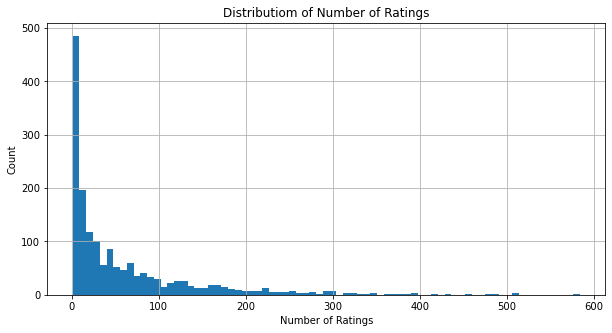

In [13]:
# [TODO] Plot the Distribution of the Number of Ratings
plt.figure(figsize=(10,5))
ratings['Number of Ratings'].hist(bins=75)
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.title("Distributiom of Number of Ratings")
plt.show()

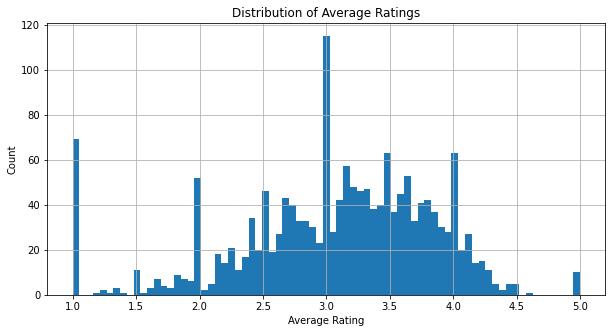

In [14]:
# [TODO] Plot the Distribution of the Average Rating Score
plt.figure(figsize=(10,5))
ratings['Mean Rating'].hist(bins=75)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Distribution of Average Ratings")
plt.show()

                   Mean Rating  Number of Ratings
Mean Rating           1.000000           0.430989
Number of Ratings     0.430989           1.000000


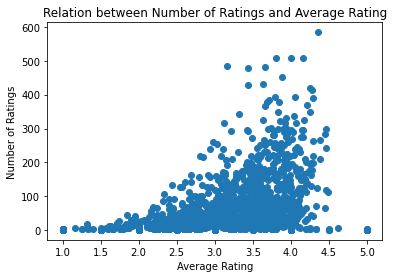

In [15]:
# [TODO] Plot a Scatter Plot for the relation between Number of Ratings and Average Score and calculate correlation between both variables
print(ratings[['Mean Rating','Number of Ratings']].corr())
plt.scatter(ratings['Mean Rating'],ratings['Number of Ratings'])
plt.xlabel("Average Rating")
plt.ylabel("Number of Ratings")
plt.title("Relation between Number of Ratings and Average Rating")
plt.show()

In [16]:
# [TODO] Please find the 2 most similiar movies to Star Wars and Liar Liar based on their ratings. 
# For this, let's create a matrix that has the user ids as rows and the movie title as features. 
# Every cell consists of the rating the user i gave to movie j. There will be a lot of NaN values, because most people only provided ratings for a minority of the movies. 
# Therefore, please ignore all movies, which had less than 75 ratings when finding the most similiar movies to Star Wars and Liar Liar. Do not ignore the movies with less than 75 ratings when calculating the user-movie matrix. 
# For creating the user-movie matrix, you can use the method [pivot_table] from pandas.

user_movie_matrix = user_movie_data.pivot_table(index='user_id',columns='title',values='rating')
user_movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# [TODO] What is the shape of this matrix? What does the shape mean?
user_movie_matrix.shape
#In total there are 994 users and a total of 1664 movies. If a value in a cell is NaN, this user has not evaluated this movie

(944, 1664)

In [18]:
# [TODO] Please select the movies 'Star Wars (1977)' and 'Liar Liar (1997)' and find the most similiar movies based on their ratings (use corrwith).
starwars_user_ratings = user_movie_matrix['Star Wars (1977)']
liarliar_user_ratings = user_movie_matrix['Liar Liar (1997)']
#Dropna, because then no user has rated both movies
similarity_to_starwars = user_movie_matrix.corrwith(starwars_user_ratings).dropna()
similarity_to_liarliar = user_movie_matrix.corrwith(liarliar_user_ratings).dropna()
#Create Dataframe with correlation to other movies
correlation_to_starwars = pd.DataFrame(similarity_to_starwars, columns=["Correlation"])
correlation_to_liarliar = pd.DataFrame(similarity_to_liarliar, columns=["Correlation"])
# [To-DO] Add information on the Number of Ratings
correlation_to_starwars = correlation_to_starwars.merge(ratings["Number of Ratings"], on = "title")
correlation_to_liarliar = correlation_to_liarliar.merge(ratings["Number of Ratings"], on = "title")
#Filter out all movies, with less than 75 Ratings

/home/somnath/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/somnath/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/somnath/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/somnath/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
# [TODO] Only keep movies with at least 75 ratings and sort by correlation for Stars Wars
correlation_to_starwars = correlation_to_starwars[correlation_to_starwars["Number of Ratings"] > 74].sort_values("Correlation", ascending=False)
correlation_to_starwars.head(3)

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507


In [20]:
# [TODO] Only keep movies with at least 75 ratings and sort by correlation for Liar Liar
correlation_to_liarliar = correlation_to_liarliar[correlation_to_liarliar["Number of Ratings"] > 74].sort_values("Correlation", ascending=False)
correlation_to_liarliar.head(3)

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
